In [187]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

## READ DATA 

In [188]:
waterdiepte=pd.read_csv('waterdiepte.csv',delimiter=';',header=0)
ec=pd.read_csv('ec.csv',delimiter=';',header=0)
water_temperature=pd.read_csv('water_temperature.csv',delimiter=';',header=0)

In [189]:
waterdiepte = waterdiepte.add_suffix(' WD')#add suffix in order to be able to seperate
ec = ec.add_suffix(' EC')
water_temperature = water_temperature.add_suffix(' WT')

In [190]:
all_df_geom=pd.concat([waterdiepte,ec,water_temperature],axis=1) # concat in a singe dataframe

In [191]:
all_df_geom.head()

,Time WD,1_KD afwaarts BASF lozing noordelijk WD,3_KD hoek midden kanaaldok B3 (BASF) WD,4_KD hoekpunt kanaaldok B3 (BASF) WD,5_KD Berendrechtsluis WD,6_KD Zandvlietsluis WD,7_KD Kanaaldok B2 WD,8_KD Lillobrug autosteiger WD,9_KD Kanaaldok B1 zuidkant (Covestro) WD,10_KD Boudewijnsluis WD,...,9_KD Kanaaldok B1 zuidkant (Covestro) WT,10_KD Boudewijnsluis WT,11_KD VanCauwelaertsluis WT,12_KD Hansadok scheepswerf (Seatank) WT,13_KD ingang Albertdok WT,14_KD ingang 5de havendok (Industrieweg) WT,15_KD Siberiabrug Havenhuis WT,16_KD Straatsburgbrug WT,17_KD Kattendijksluis (Sasdok) WT,18_KD Mexicobruggen WT
0,2021-12-01T01:00:00+02:00,"758,091","1.162,833","1.164,4","993,667","977,6","1.257,167","1.415,667","1.238,7","1.203,3",...,"11,3","11,1","10,99","10,883","10,608","10,82","9,38","8,667","9,408","8,717"
1,2021-12-01T02:00:00+02:00,784,"1.172,083","1.184,667",1.007,"989,75","1.284,75","1.439,833","1.260,222","1.209,583",...,"11,3","11,092","11,089","10,9","10,6","10,867","9,4","8,867","9,417","8,8"
2,2021-12-01T03:00:00+02:00,"790,778","1.166,083","1.164,167","1.002,25","971,727","1.272,556","1.441,4","1.281,3",1.207,...,"11,3","11,125","11,1","10,9","10,54","10,9","9,4","9,12","9,5","8,817"
3,2021-12-01T04:00:00+02:00,"764,545","1.170,625","1.152,4","998,833","985,667","1.282,091","1.431,167","1.268,875","1.210,167",...,"11,3","11,15","11,1","10,9","10,5","10,9","9,4","9,02","9,567","8,82"
4,2021-12-01T05:00:00+02:00,"779,545","1.170,909","1.177,4","1.003,917","987,182","1.278,364","1.448,4","1.269,889","1.206,818",...,"11,3","11,1","11,1","10,9","10,5","10,9","9,42","8,95","9,525","8,84"


## Preprocess Dataset 

In [192]:
def preprocess(df):
    df=df.drop(columns={'Time WD','Time EC','Time WT'}) #drop time
    #transform to floats in proper form
    df=df.apply(lambda x: x.str.replace('.','')) 
    df=df.apply(lambda x: x.str.replace(',','.'))
    df=df.astype(float).round(3)
    pdf=df.fillna(df.mean()) #fill nan values with the mean of the column
    
    return pdf

In [193]:
all_df_geom=preprocess(all_df_geom)

<ipython-input-192-c9c7592e7a15>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df=df.apply(lambda x: x.str.replace('.',''))


In [194]:
all_df_geom.head()

,1_KD afwaarts BASF lozing noordelijk WD,3_KD hoek midden kanaaldok B3 (BASF) WD,4_KD hoekpunt kanaaldok B3 (BASF) WD,5_KD Berendrechtsluis WD,6_KD Zandvlietsluis WD,7_KD Kanaaldok B2 WD,8_KD Lillobrug autosteiger WD,9_KD Kanaaldok B1 zuidkant (Covestro) WD,10_KD Boudewijnsluis WD,11_KD VanCauwelaertsluis WD,...,9_KD Kanaaldok B1 zuidkant (Covestro) WT,10_KD Boudewijnsluis WT,11_KD VanCauwelaertsluis WT,12_KD Hansadok scheepswerf (Seatank) WT,13_KD ingang Albertdok WT,14_KD ingang 5de havendok (Industrieweg) WT,15_KD Siberiabrug Havenhuis WT,16_KD Straatsburgbrug WT,17_KD Kattendijksluis (Sasdok) WT,18_KD Mexicobruggen WT
0,758.091,1162.833,1164.400,993.667,977.600,1257.167,1415.667,1238.700,1203.300,209.800,...,11.3,11.100,10.990,10.883,10.608,10.820,9.38,8.667,9.408,8.717
1,784.000,1172.083,1184.667,1007.000,989.750,1284.750,1439.833,1260.222,1209.583,232.444,...,11.3,11.092,11.089,10.900,10.600,10.867,9.40,8.867,9.417,8.800
2,790.778,1166.083,1164.167,1002.250,971.727,1272.556,1441.400,1281.300,1207.000,232.000,...,11.3,11.125,11.100,10.900,10.540,10.900,9.40,9.120,9.500,8.817
3,764.545,1170.625,1152.400,998.833,985.667,1282.091,1431.167,1268.875,1210.167,226.222,...,11.3,11.150,11.100,10.900,10.500,10.900,9.40,9.020,9.567,8.820
4,779.545,1170.909,1177.400,1003.917,987.182,1278.364,1448.400,1269.889,1206.818,220.200,...,11.3,11.100,11.100,10.900,10.500,10.900,9.42,8.950,9.525,8.840


## Make a dataframe, consisted from all three variables for each Geo Point.

In [195]:

all_df_geom.columns = all_df_geom.columns.to_series().str[:3]
d = {}
for i in range(1,19):
    d[i] = pd.DataFrame()
    d[i]=all_df_geom.loc[:,pdf.columns.str.startswith(str(i)+'_')]
    d[i]=d[i].corr()

In [196]:
d[10]#ex.for geography 10

,10_,10_,10_
10_,1.000000,0.583050,0.561269
10_,0.583050,1.000000,0.905481
10_,0.561269,0.905481,1.000000


## Calculate Pearson's Correlation for each Geograpgy and Display with Heatmaps 

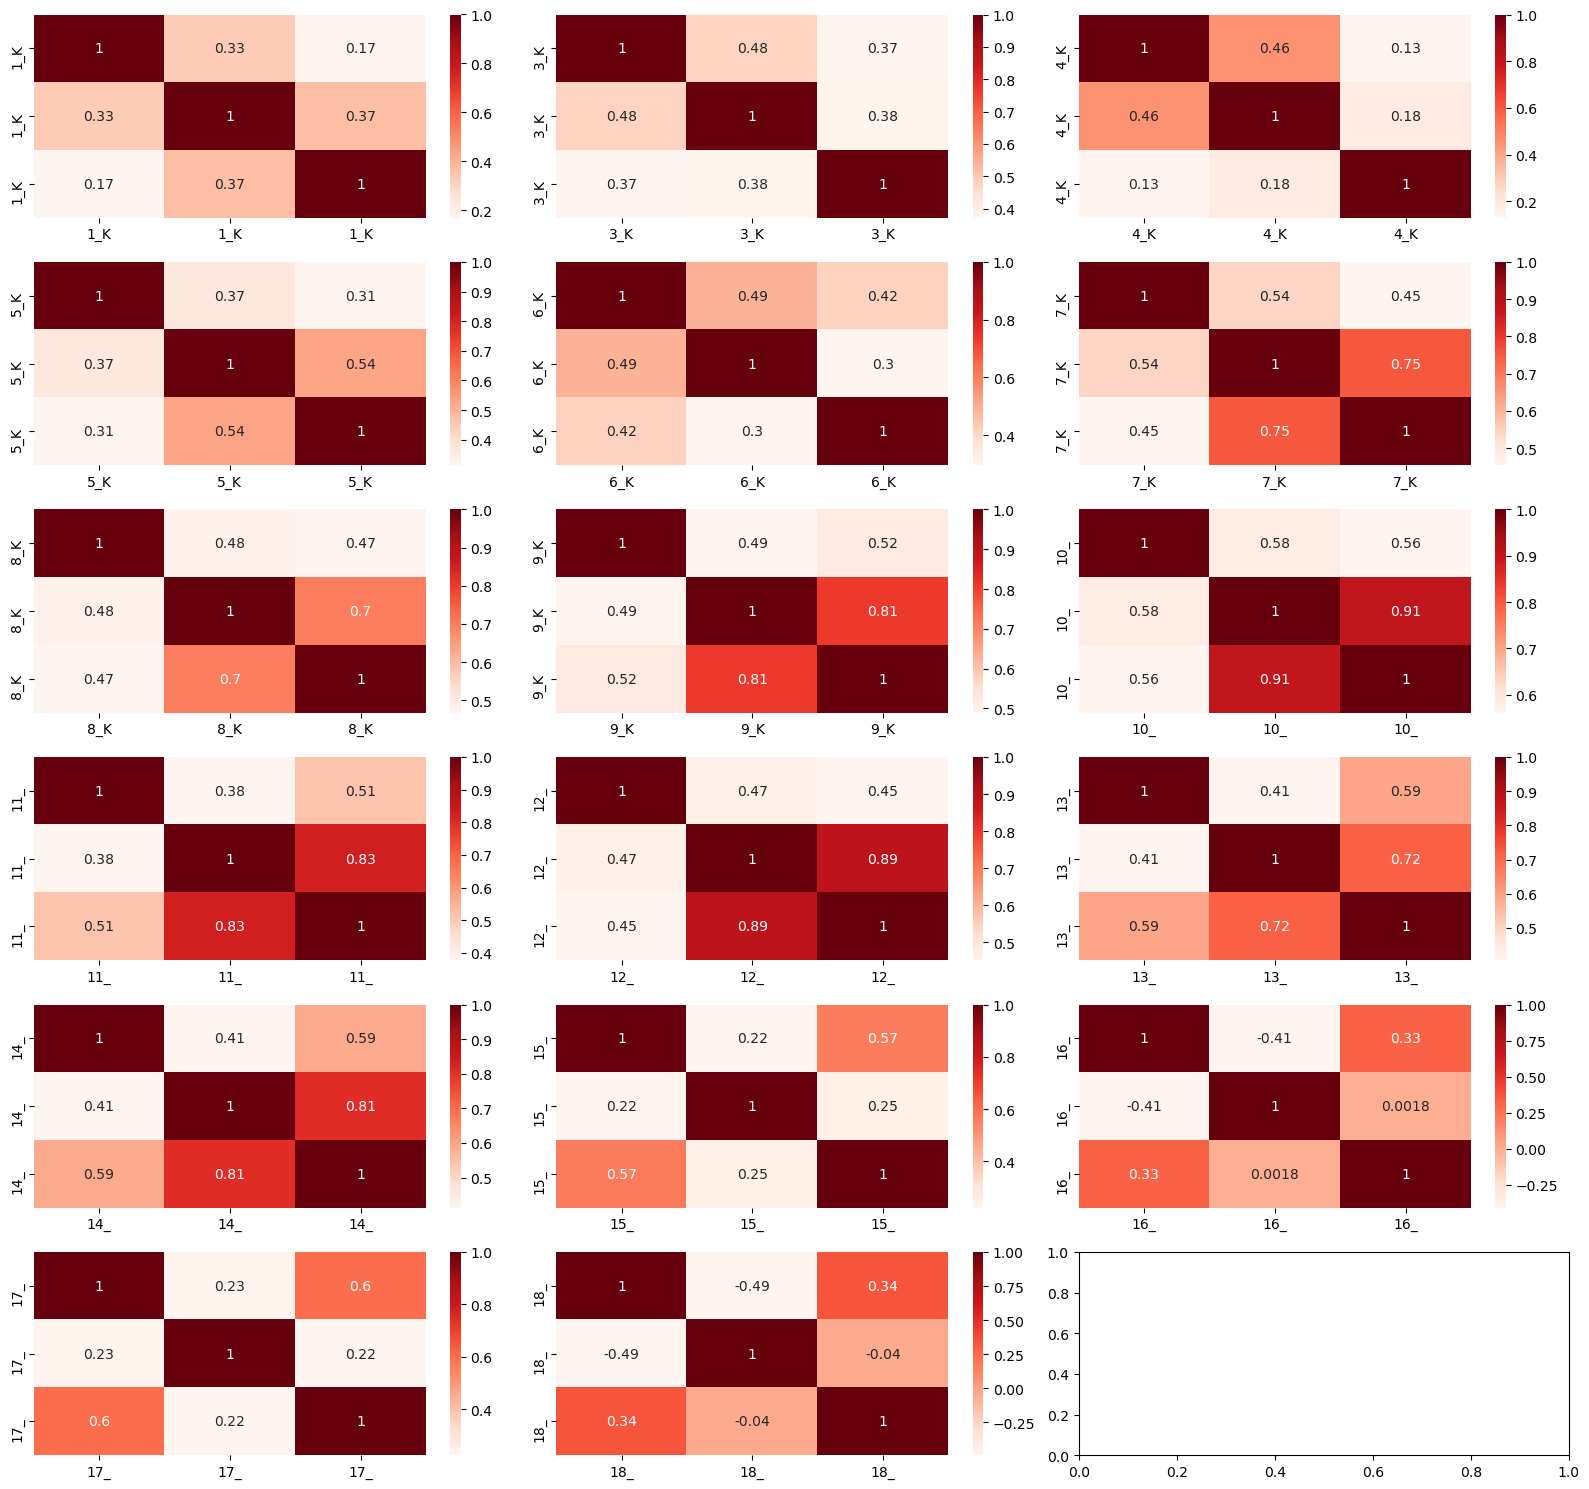

In [197]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(16,15))


sns.heatmap(d[1], annot=True, cmap=plt.cm.Reds,ax=axes[0,0])
sns.heatmap(d[3], annot=True, cmap=plt.cm.Reds,ax=axes[0,1])
sns.heatmap(d[4], annot=True, cmap=plt.cm.Reds,ax=axes[0,2])
sns.heatmap(d[5], annot=True, cmap=plt.cm.Reds,ax=axes[1,0])
sns.heatmap(d[6], annot=True, cmap=plt.cm.Reds,ax=axes[1,1])
sns.heatmap(d[7], annot=True, cmap=plt.cm.Reds,ax=axes[1,2])
sns.heatmap(d[8], annot=True, cmap=plt.cm.Reds,ax=axes[2,0])
sns.heatmap(d[9], annot=True, cmap=plt.cm.Reds,ax=axes[2,1])
sns.heatmap(d[10], annot=True, cmap=plt.cm.Reds,ax=axes[2,2])
sns.heatmap(d[11], annot=True, cmap=plt.cm.Reds,ax=axes[3,0])
sns.heatmap(d[12], annot=True, cmap=plt.cm.Reds,ax=axes[3,1])
sns.heatmap(d[13], annot=True, cmap=plt.cm.Reds,ax=axes[3,2])
sns.heatmap(d[14], annot=True, cmap=plt.cm.Reds,ax=axes[4,0])
sns.heatmap(d[15], annot=True, cmap=plt.cm.Reds,ax=axes[4,1])
sns.heatmap(d[16], annot=True, cmap=plt.cm.Reds,ax=axes[4,2])
sns.heatmap(d[17], annot=True, cmap=plt.cm.Reds,ax=axes[5,0])
sns.heatmap(d[18], annot=True, cmap=plt.cm.Reds,ax=axes[5,1])

plt.savefig("new_features_per_geography_pearson_corr.png")
plt.tight_layout()
plt.show()

# Approach overlooking Geography 

# Preprocess 

In [198]:
def get_only_means_per_feature(wd,ec,wt):
    
    wd=wd.drop(columns={'Time WD'})
    ec=ec.drop(columns={'Time EC'})
    wt=wt.drop(columns={'Time WT'})
    
    
    wd=wd.apply(lambda x: x.str.replace('.',''))
    wd=wd.apply(lambda x: x.str.replace(',','.'))
    wd=wd.astype(float).round(3)
    wd=wd.fillna(wd.mean())
    
    ec=ec.apply(lambda x: x.str.replace('.',''))
    ec=ec.apply(lambda x: x.str.replace(',','.'))
    ec=ec.astype(float).round(3)
    ec=ec.fillna(ec.mean())
    
    wt=wt.apply(lambda x: x.str.replace('.',''))
    wt=wt.apply(lambda x: x.str.replace(',','.'))
    wt=wt.astype(float).round(3)
    wt=wt.fillna(wt.mean())
    
    #append all column to one column in order to overllok geography
    wd=pd.melt(wd).drop(columns={'variable'})
    ec=pd.melt(ec).drop(columns={'variable'})
    wt=pd.melt(wt).drop(columns={'variable'})
    
  
    #calculate the mean for each feature
    mean_wd=wd['value'].mean()
    mean_ec=ec['value'].mean()
    mean_wt=wt['value'].mean()
    
    wd_data = {'MEAN Waterdiepte':mean_wd}
    ec_data = {'MEAN Electricity':mean_ec}
    wt_data = {'MEAN Water Temperature':mean_wt}
    
    mean_wd = pd.DataFrame(wd_data,index=[1])
    mean_ec = pd.DataFrame(ec_data,index=[1])
    mean_wt = pd.DataFrame(wt_data,index=[1])
    
    mean_df=pd.concat([mean_wd,mean_ec,mean_wt],axis=1)
    
    wd = wd.rename(columns={'value': 'Waterdiepte'})
    ec = ec.rename(columns={'value': 'Electricity'})
    wt = wt.rename(columns={'value': 'Water Temperature'})
  
    return wd, ec, wt, mean_df

In [199]:
all_wd, all_ec, all_wt,mean_df=get_only_means_per_feature(waterdiepte,ec,water_temperature)

<ipython-input-198-e3a9bea91d6f>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  wd=wd.apply(lambda x: x.str.replace('.',''))
<ipython-input-198-e3a9bea91d6f>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ec=ec.apply(lambda x: x.str.replace('.',''))
<ipython-input-198-e3a9bea91d6f>:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  wt=wt.apply(lambda x: x.str.replace('.',''))


## The MEAN Value For Each Feature 

In [200]:
mean_df

,MEAN Waterdiepte,MEAN Electricity,MEAN Water Temperature
1,1130.629217,8998.313617,9.372098


## Concatenate all features to one dataframe 

In [201]:
all_df=pd.concat([all_wd,all_ec,all_wt],axis=1)

In [202]:
all_df.head()

,Waterdiepte,Electricity,Water Temperature
0,758.091,8033.091,10.545
1,784.000,8063.583,10.575
2,790.778,8099.333,10.656
3,764.545,7788.182,10.400
4,779.545,7741.909,10.336


## Calculate Correlation and display in a single Heatmap 

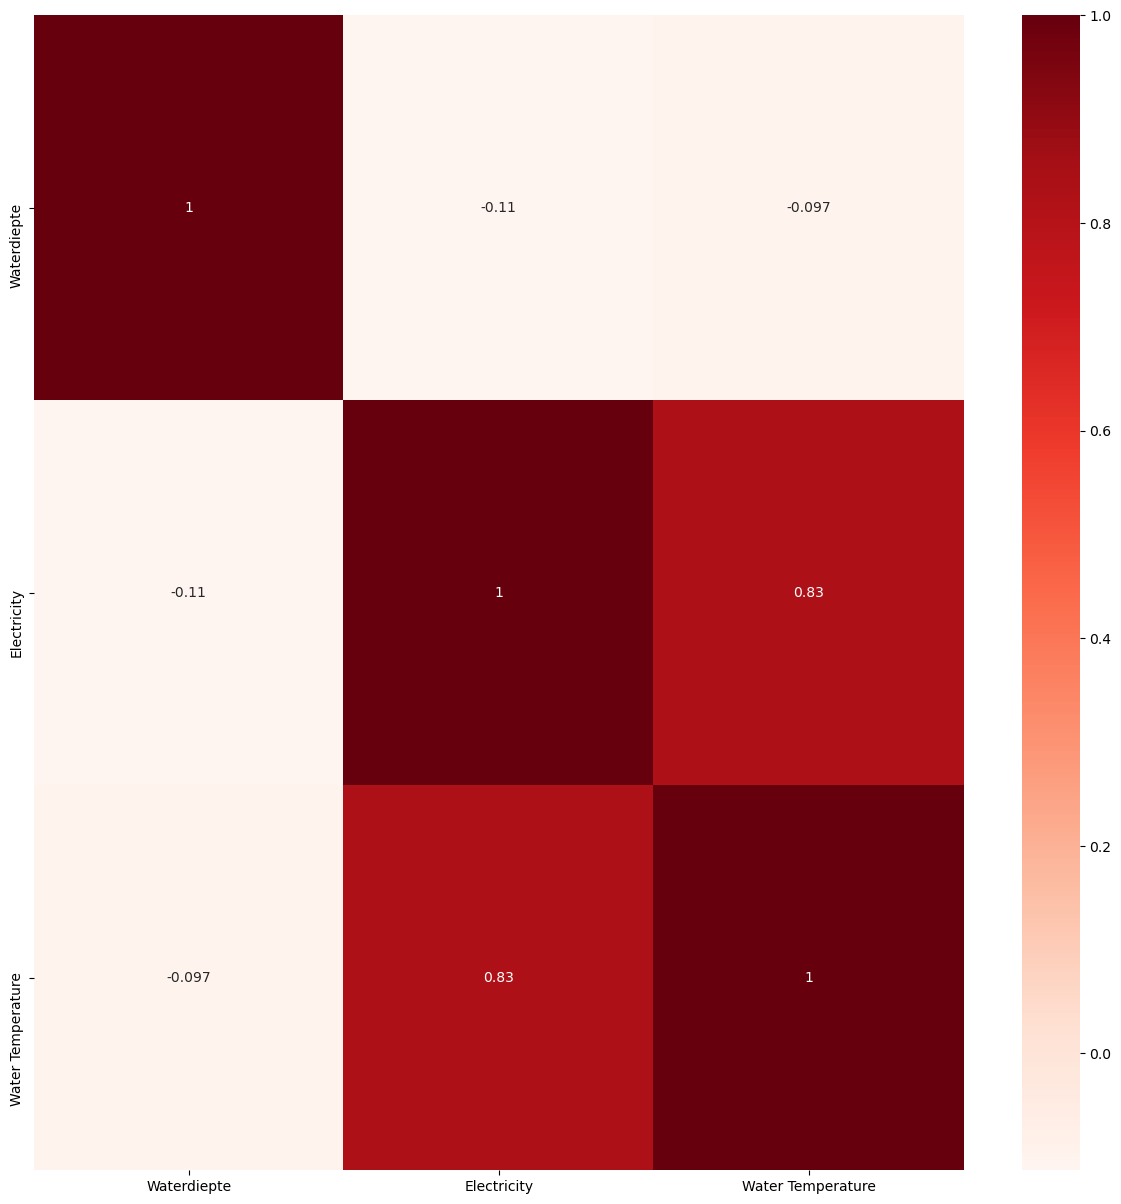

In [203]:
plt.figure(figsize=(15,15))
corr = all_df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

plt.savefig("new_data_concated_pearson_corr.png")
plt.show()